### This project was undertaken by Princilla Abena Koranteng.

## SUPERSTORE SALES ANALYSIS

### Problem Statement

- A multinational retail company has been making good sales from 2014 to 2017, but their recorded profits do not tally with the increasing amount of sales they have made throughout the period. As an initative of the company to keep increasing their sales, whilst maximizing their sales as best as possible, the campagn titled **'Operation  Increase Sales and Profit'(OISP)** was launched.
- As a part of the campaign initatve, a Data Analyst is required to analyze the dataset that contains their four year daily sales records to draw insights from their "sitting" data before the management team of the company can take any actionable decision with regards to the campaign.


### My Task

- To analyse the given data and advise management on what to do to increase sales and profit as intended in the compaign by outlaying the analytical steps inline with CRISP-DM(Cross Industry Standard Process for Data Mining)steps, asking the nescessary questions and providing answers based on the data.
- Submit statistical summaries of the key variables considering the aim of the campaign to management including visualizations and a report on my findings.

**Powerpoint or any other presentation application can be used for the presentation.**

### STEP 1: IMPORT NECESSARY MODULES

Why is it important to import certain modules when working on a project?
- Think of importing modules like starting a fireplace. You  have your wood, paper or anything else you need to make a fire except the enabler, which in this case, is a light match or lighter.
- Without importing a module that allows you read a csv file from your desktop, ypu can't. Without importing a module that allows you to plot graphs, you can't plot a graph.
- The necessary modules are imported as shown in the next line of code.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 22)
pd.set_option('display.max_rows', 10)

### STEP 2: DATA CLEANING

- With the understanding that Data tells stories, it is important that it is clean before any analysis is made. As the saying goes, Garbage In, Garbage Out. The data was cleaning in Six steps.

#### STEP 2.1 Read the data. Making sure you the data in your current working directory makes it easier.

In [11]:
df = pd.read_csv('superstore.csv', index_col='Row ID', encoding='windows-1254')
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


#### STEP 2.2 How big is the dataset?

In [12]:
df.shape
print('The number of rows is {} and number columns in the dataframe is {}'.format(df.shape[0],df.shape[1]))

The number of rows is 9994 and number columns in the dataframe is 20


#### STEP 2.3 Is each column title of the dataset clean and descriptive?
- The reason why this is important is because in the case where other individual or individuals works on your data, the possibility of understanding and analyzing the context of each column is easy.

In [13]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

- In the line of code above, it is clear that some of the titles have white spaces, and one column titled 'Sales' was renamed to 'Discounted Sales' as it was discovered that the Sales column were sales made per discount on each product sold.

In [14]:
df.columns = ['OrderID','OrderDate', 'ShipDate', 'ShipMode', 'CustomerID', 'CustomerName', 'Segment' ,
                         'Country', 'City', 'State', 'PostalCode', 'Region', 'ProductID', 'Category', 'SubCategory',
                         'ProductName' , 'DiscountedSales', 'Quantity', 'Discount(%)', 'Profit']

- The country code was removed as it was repeated through out. This in corrected in the line of code below.

In [15]:
df.drop(['Country'], inplace = True, axis = 1)

- General information from the dataset was retrieved in the line of code below to under the datatype of each column. Observng closely, it is seen that some datatypes of columns are wrong. Take for instance, the OrderDate column is represented as an Object datatype when it s supposed to be a Datetime datatype.
- This was be corrected later in the analysis.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          9994 non-null   object 
 1   OrderDate        9994 non-null   object 
 2   ShipDate         9994 non-null   object 
 3   ShipMode         9994 non-null   object 
 4   CustomerID       9994 non-null   object 
 5   CustomerName     9994 non-null   object 
 6   Segment          9994 non-null   object 
 7   City             9994 non-null   object 
 8   State            9994 non-null   object 
 9   PostalCode       9994 non-null   int64  
 10  Region           9994 non-null   object 
 11  ProductID        9994 non-null   object 
 12  Category         9994 non-null   object 
 13  SubCategory      9994 non-null   object 
 14  ProductName      9994 non-null   object 
 15  DiscountedSales  9994 non-null   float64
 16  Quantity         9994 non-null   int64  
 17  Discount(%)   

#### STEP 2.4 Check for duplicates in the dataset and remove them

In [17]:
duplicates = df.duplicated(keep = False)
duplicates.sum()

2

In [18]:
# Sort your duplicated sales to see duplicated values
duplicated_sales = df[duplicates].sort_values('Row ID')
duplicated_sales

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,PostalCode,Region,ProductID,Category,SubCategory,ProductName,DiscountedSales,Quantity,Discount(%),Profit
Row ID,,,,,,,,,,,,,,,,,,,
3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3407,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [19]:
df.drop_duplicates(keep = 'first',ignore_index = True,inplace=True)
df.duplicated(keep = False).unique() #code to confirm that the found duplicates have been dropped
df.duplicated().sum() #code to confirm that the duplcates have been dropped

0

In [20]:
df.shape #Confrmation of dropped duplicates through the checking of total number of rows have reduced by 1

(9993, 19)

#### STEP 2.5  A step by step cleaning of each column in the dataset
- Remember in a previous exploration of the dataset, it was discovered that some datatypes of the columns were not correct? This is going to be corrected in the followng lines of code.

- **Column 1 - Order ID**

In [21]:
df['OrderID'].describe() #summary statistics of the Order ID Column

count               9993
unique              5009
top       CA-2017-100111
freq                  14
Name: OrderID, dtype: object

In [22]:
df['OrderID'].dtype     #checking the datatype of the OrderID Column

dtype('O')

- **Column 2 - Order Date**

In [23]:
df['OrderDate'].dtype  #checking the datatype of the OrderDate Column

dtype('O')

In [24]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])   # Converting into the date to the correct datatype
df['OrderDate'].dtype

dtype('<M8[ns]')

- **Column 3 - Ship Date**

In [25]:
df['ShipDate'] = pd.to_datetime(df['ShipDate'])    #checking the datatype of the ShipDate Column
df['ShipDate'].dtype

dtype('<M8[ns]')

- **Column 4 - Ship Mode**

In [26]:
df['ShipMode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [27]:
df['ShipMode'] = df['ShipMode'].astype('category')    # Changing to datatype to category
df['ShipMode'].dtype

CategoricalDtype(categories=['First Class', 'Same Day', 'Second Class', 'Standard Class'], ordered=False)

In [28]:
df['ShipMode'].describe()   #summary statistcs of the ShipMode Column

count               9993
unique                 4
top       Standard Class
freq                5967
Name: ShipMode, dtype: object

- **Column 5 - Customer ID**

In [29]:
df['CustomerID'].nunique()

793

In [30]:
df['CustomerID'].describe()    #checking summary statistics of the Customer ID column

count         9993
unique         793
top       WB-21850
freq            37
Name: CustomerID, dtype: object

- **Column 6 - Customer Name**

In [31]:
df['CustomerName'].describe()   #checking summary statistics of the Customer Name column

count              9993
unique              793
top       William Brown
freq                 37
Name: CustomerName, dtype: object

- **Column 7 - Segment**

In [32]:
df['Segment'].describe()    #checking summary statistics of the Segment column

count         9993
unique           3
top       Consumer
freq          5191
Name: Segment, dtype: object

In [33]:
df['Segment'] = df['Segment'].astype('category')  #changing the datatype of the segment column from object to category dtype
df['Segment'].dtype

CategoricalDtype(categories=['Consumer', 'Corporate', 'Home Office'], ordered=False)

- **Column 8 - City**

In [34]:
df['City'].describe()      #checking summary statistics of the City column

count              9993
unique              531
top       New York City
freq                915
Name: City, dtype: object

- **Column 9 - State**

In [35]:
df['State'].describe()     #checking summary statistics of the State column

count           9993
unique            49
top       California
freq            2001
Name: State, dtype: object

- **Column 10 - Postal Code**

In [36]:
df['PostalCode'] = df['PostalCode'].astype('str')   # Changing PostalCode from int to str
df['PostalCode'].describe()       #checking summary statistics of the PostalCode column

count      9993
unique      631
top       10035
freq        263
Name: PostalCode, dtype: object

- **Column 11 - Region**

In [37]:
df['Region'].describe()        #checking summary statistics of the Region column

count     9993
unique       4
top       West
freq      3203
Name: Region, dtype: object

- **Column 12 - Product ID**

In [38]:
df['ProductID'].describe()      #checking summary statistics of the ProductID column

count                9993
unique               1862
top       OFF-PA-10001970
freq                   19
Name: ProductID, dtype: object

- **Column 13 - Product Name**

In [39]:
df['ProductName'].describe()    #checking summary statistics of the ProductName column

count                9993
unique               1850
top       Staple envelope
freq                   48
Name: ProductName, dtype: object

- **Column 14 - Category**

In [40]:
df['Category'].describe()  #checking summary statistics of the Category column

count                9993
unique                  3
top       Office Supplies
freq                 6026
Name: Category, dtype: object

In [41]:
df['Category'] = df['Category'].astype('category')  #change datatype of Category column to category datatype
df['Category']

0             Furniture
1             Furniture
2       Office Supplies
3             Furniture
4       Office Supplies
             ...       
9988          Furniture
9989          Furniture
9990         Technology
9991    Office Supplies
9992    Office Supplies
Name: Category, Length: 9993, dtype: category
Categories (3, object): ['Furniture', 'Office Supplies', 'Technology']

- **Column 15 - SubCategory**

In [42]:
df['SubCategory'].describe()      #checking summary statistics of the SubCategory column

count        9993
unique         17
top       Binders
freq         1523
Name: SubCategory, dtype: object

In [43]:
df['SubCategory'] = df['SubCategory'].astype('category')   #change dataype of SubCategory Column
df['SubCategory']

0         Bookcases
1            Chairs
2            Labels
3            Tables
4           Storage
           ...     
9988    Furnishings
9989    Furnishings
9990         Phones
9991          Paper
9992     Appliances
Name: SubCategory, Length: 9993, dtype: category
Categories (17, object): ['Accessories', 'Appliances', 'Art', 'Binders', ..., 'Phones', 'Storage',
                          'Supplies', 'Tables']

- **Column 16 - DiscountedSales**

In [44]:
df['DiscountedSales'].describe()  #summary statistics of DiscountedSales Column

count     9993.000000
mean       229.852846
std        623.276074
min          0.444000
25%         17.280000
50%         54.480000
75%        209.940000
max      22638.480000
Name: DiscountedSales, dtype: float64

- **Column 17 - Quantity**

In [45]:
df['Quantity'].describe()        #summary statistics of Quantity Column

count    9993.000000
mean        3.789753
std         2.225149
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

- **Column 18 - Discount(%)**

In [46]:
df['Discount(%)'].describe()       #summary statistics of DiscountAmount Column

count    9993.000000
mean        0.156188
std         0.206457
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount(%), dtype: float64

- **Column 19 - Profit**

In [47]:
df['Profit'].describe()             #summary statistics of Profit Column

count    9993.000000
mean       28.660971
std       234.271476
min     -6599.978000
25%         1.731000
50%         8.671000
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

#### STEP 2.6 - Checking summary statistics of numerical columns in the dataset

In [48]:
df.describe()

,DiscountedSales,Quantity,Discount(%),Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971
std,623.276074,2.225149,0.206457,234.271476
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.731000
50%,54.480000,3.000000,0.200000,8.671000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


#### STEP 2.7 Checking summary statistics of non-numerical columns in the dataset

In [49]:
df.describe(include = np.object)

,OrderID,CustomerID,CustomerName,City,State,PostalCode,Region,ProductID,ProductName
count,9993,9993,9993,9993,9993,9993,9993,9993,9993
unique,5009,793,793,531,49,631,4,1862,1850
top,CA-2017-100111,WB-21850,William Brown,New York City,California,10035,West,OFF-PA-10001970,Staple envelope
freq,14,37,37,915,2001,263,3203,19,48


#### STEP 2.8  Adding New Columns To the Dataset
- New columns were added to the dataset in order to easy analyze the data in the dataset.

In [50]:
df_month = df["OrderDate"].dt.month_name()   #adding a month column
df.insert(loc = 3, column = 'OrderMonth', value = df_month)

In [51]:
df_year = pd.DatetimeIndex(df['OrderDate']).year  #adding a new column called Year
df.insert(loc = 4, column = 'OrderYear', value = df_year)

In [52]:
df['OrderYear'] = df['OrderYear'].astype('str')  #changing OrderYear column from integer to string
df['OrderYear']

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9988    2014
9989    2017
9990    2017
9991    2017
9992    2017
Name: OrderYear, Length: 9993, dtype: object

- Calculating the original sales without discounts and adding it to the dataset as a new column

In [53]:
original_sales = (1/(1-df['Discount(%)']))*df['DiscountedSales']
original_sales

0        261.96
1        731.94
2         14.62
3       1741.05
4         27.96
         ...   
9988      31.56
9989      91.96
9990     323.22
9991      29.60
9992     243.16
Length: 9993, dtype: float64

In [54]:
df['OriginalSales'] = original_sales

- Calculating Unit Price of each product and adding it to the dataset as a new column

In [55]:
df['UnitPrice'] = original_sales/df['Quantity']
df['UnitPrice']

0       130.98
1       243.98
2         7.31
3       348.21
4        13.98
         ...  
9988     10.52
9989     45.98
9990    161.61
9991      7.40
9992    121.58
Name: UnitPrice, Length: 9993, dtype: float64

- Calculating Cost Price of each product and adding it to the dataset as a new column

In [56]:
df_cost_price = df['DiscountedSales'] - df['Profit']
df_cost_price

0        220.0464
1        512.3580
2          7.7486
3       1340.6085
4         19.8516
          ...    
9988      21.1452
9989      76.3268
9990     239.1828
9991      16.2800
9992     170.2120
Length: 9993, dtype: float64

In [57]:
df['CostPrice'] = df_cost_price

- Calculating Discounted Amount of each product and adding it to the dataset as a new column

In [58]:
df['DiscountedAmount'] = df['OriginalSales'] - df['DiscountedSales']

- Calculating Profit Percentage of each product and adding it to the dataset as a new column

In [59]:
df['Profit%']=(df['Profit']/df['CostPrice'])*100

- With the order date and delivery date columns n the dataset, delivery day lengths were calculated and added as a new column to the dataset

In [60]:
df_interval = df["ShipDate"] - df["OrderDate"]
df_interval = df_interval / np.timedelta64(1,'D')
df.insert(loc = 5, column = 'DeliveryDays', value = df_interval)

In [61]:
df['DeliveryDays'] = df['DeliveryDays'].astype('int')   #changing datatype of deliverydays column from int to str
df['Reliability'] = np.where(df['DeliveryDays'] >= 5, 'Delayed', 'Timely')  #confirmation on whether deliveries were timely or delayed.

### STEP 3: EXPLORATORY DATA ANALYSIS

- The fundamental purpose of exploratory data analysis is to aid in the examination of data prior to making any assumptions.
- It can aid in the detection of obvious errors, the understanding of data patterns, the detection of outliers or unexpected events, and the discovery of noteworthy connections between variables.
- The followng visualizations were done in the lines of code below.

**HEATMAP FOR CORRELATION**

This is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The darker the colour, the stronger the correlation, the lighter the colour, the lesser the correlation.

In [62]:
heatmap = df[['CostPrice', 'UnitPrice' ,'Quantity', 'OriginalSales', 'Profit', 'Discount(%)' , 'DiscountedAmount',
              'DiscountedSales']]
heatmap.head()

,CostPrice,UnitPrice,Quantity,OriginalSales,Profit,Discount(%),DiscountedAmount,DiscountedSales
0,220.0464,130.98,2,261.96,41.9136,0.00,0.0000,261.9600
1,512.3580,243.98,3,731.94,219.5820,0.00,0.0000,731.9400
2,7.7486,7.31,2,14.62,6.8714,0.00,0.0000,14.6200
3,1340.6085,348.21,5,1741.05,-383.0310,0.45,783.4725,957.5775
4,19.8516,13.98,2,27.96,2.5164,0.20,5.5920,22.3680


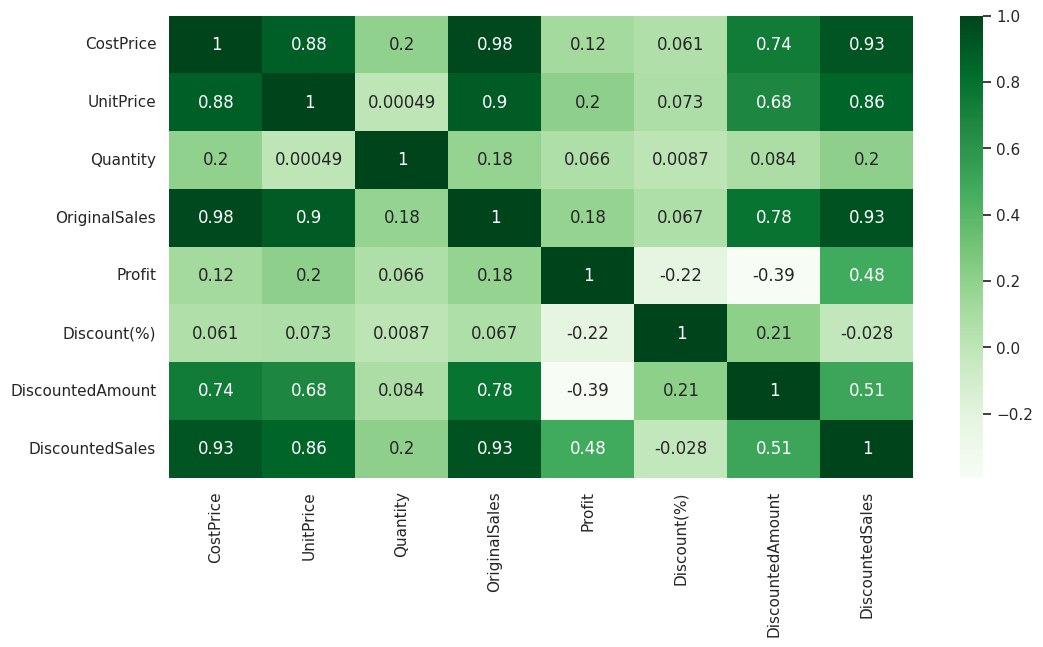

In [63]:
plt.figure(figsize=(12,6))
sns.set_theme(style="white")
corr = heatmap.corr()
heatmap = sns.heatmap(corr, annot=True, cmap = 'Greens')

**NUMERICAL DISTRIBUTION OF COLUMNS**
- The percentage of numeric distribution allows for the measurement of each product's or reference's coverage in a distribution network.

- This is an important metric for determining a product's sales potential and forecasting sales.

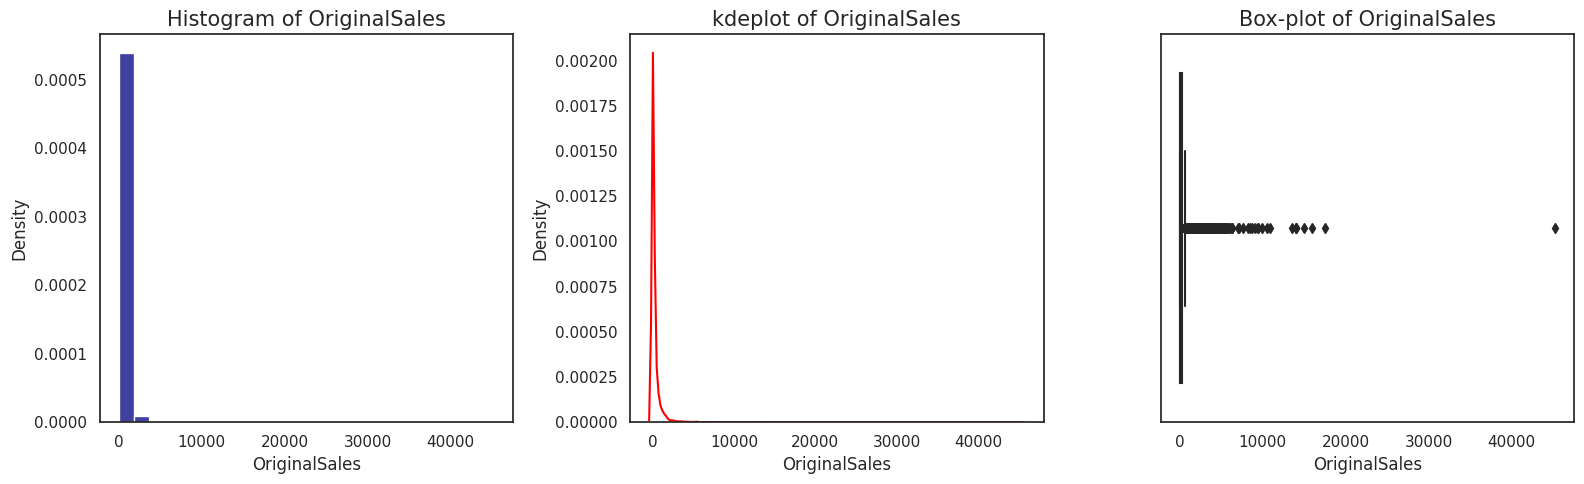

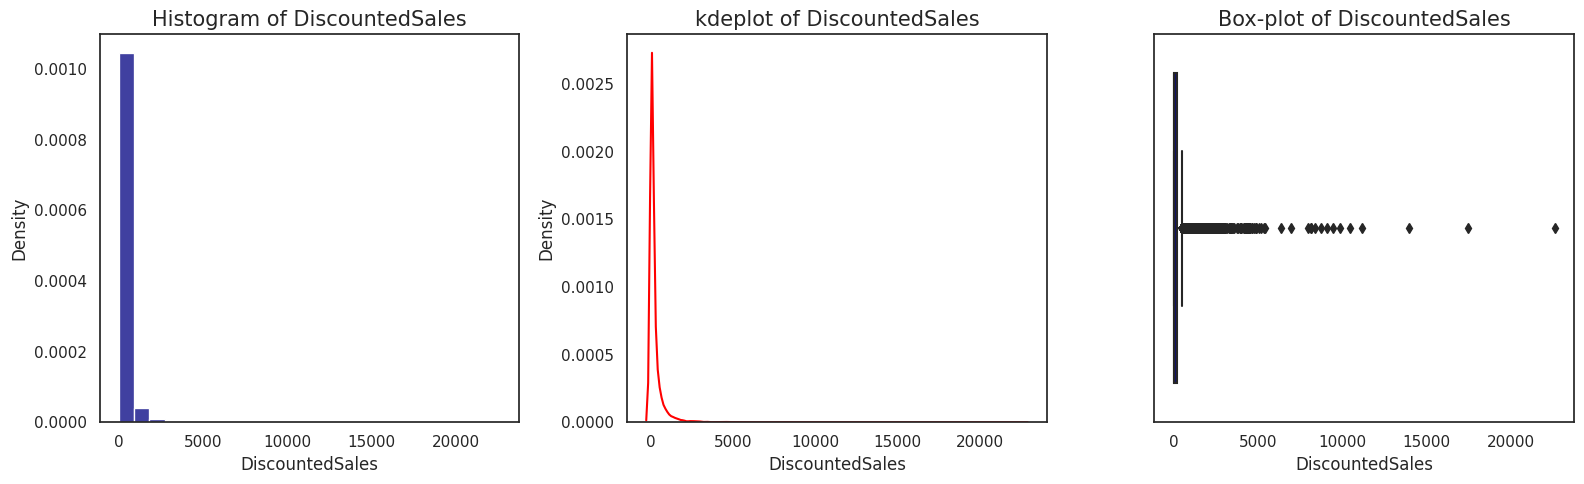

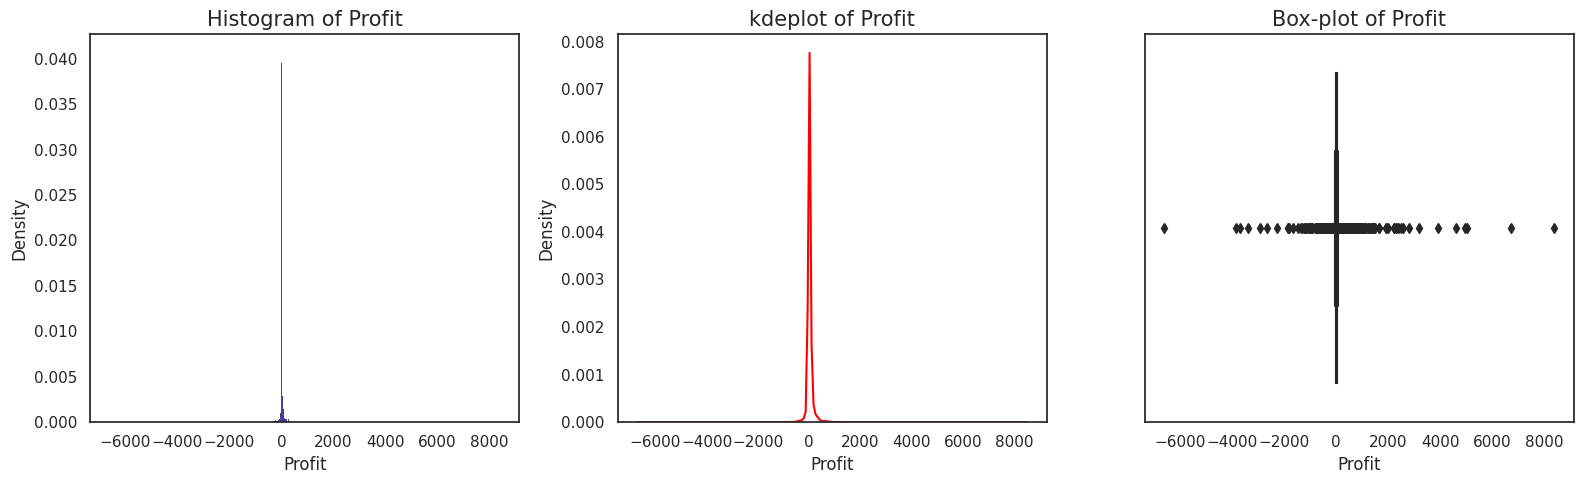

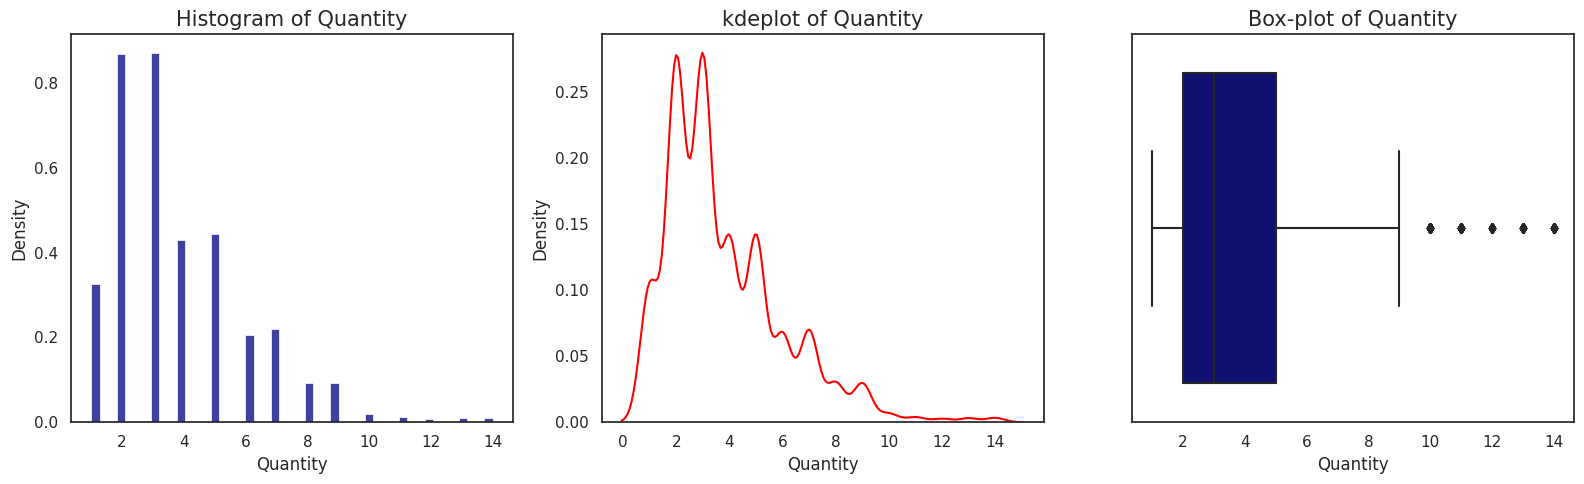

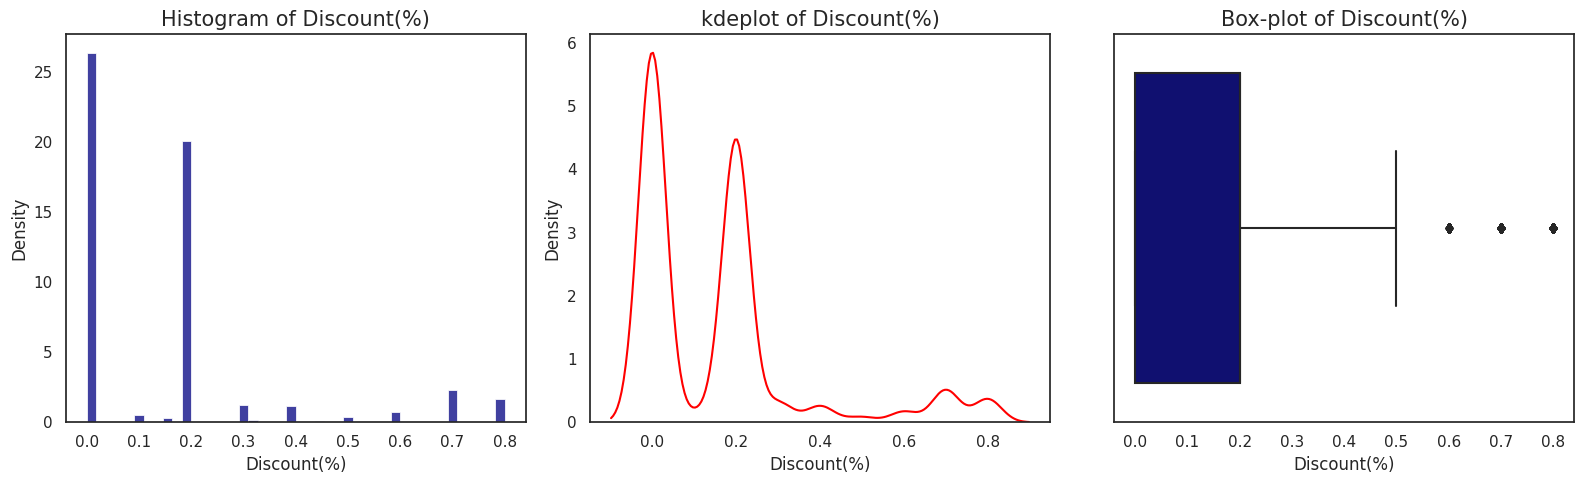

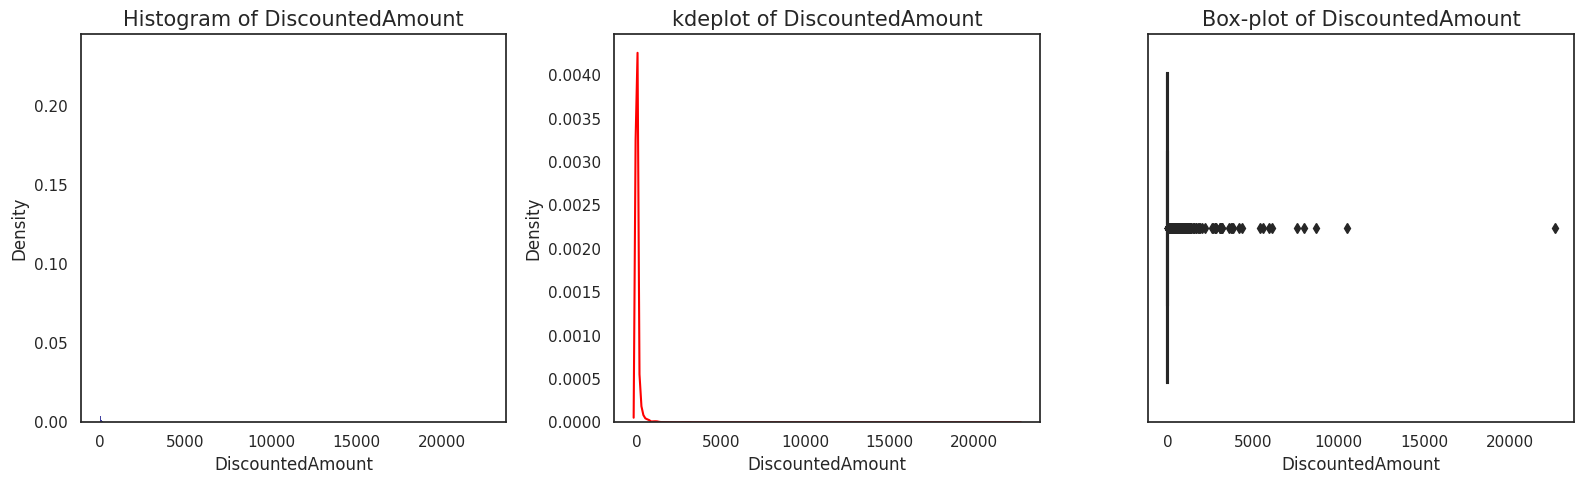

In [64]:
imp_numerical_cols= df[['OriginalSales','DiscountedSales','Profit','Quantity','Discount(%)', 'DiscountedAmount']]
for i,col in enumerate(imp_numerical_cols):
    plt.figure(figsize=(16,5))
    bins='auto'
    if i in [0,1]:
        bins=25
    plt.subplot(1,3,1)
    sns.histplot(data = df,x=col,stat='density',bins=bins,color='navy')
    plt.title(f'Histogram of {col}',size=15)

    plt.subplot(1,3,2)
    sns.kdeplot(data = df,x=col,color='red')
    plt.title(f'kdeplot of {col}',size=15)

    plt.subplot(1,3,3)
    sns.boxplot(data = df,x=col,color='navy')
    plt.title(f'Box-plot of {col}',size=15)
    plt.tight_layout()
    plt.show()

The following observations were made from the numerical distribution of some column in the immediate line of code above
- The Distribution of Original Sales and DiscountedSales is extremely right skewed.
- The Distribution of Profit is Normally distributed with very low value of standard deviation.  
- The Distribution of Quantity sold is right skewed with a lot of outliers on the right side
- The Distribution of Discount is multimodel in nature

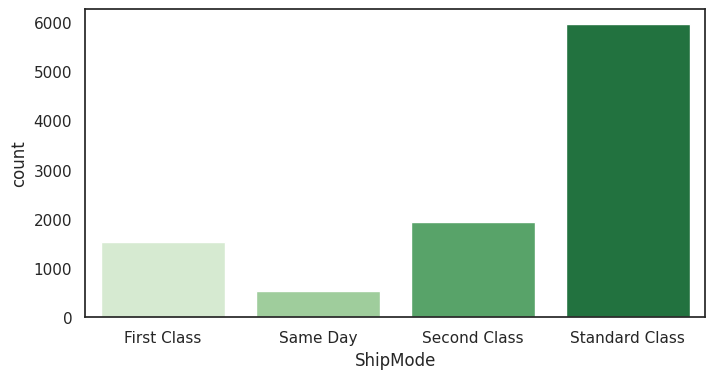

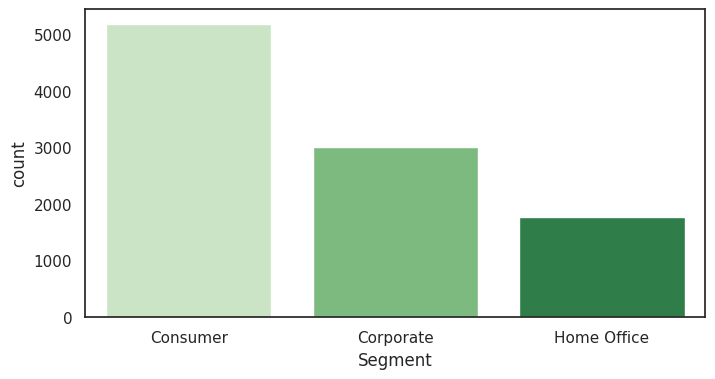

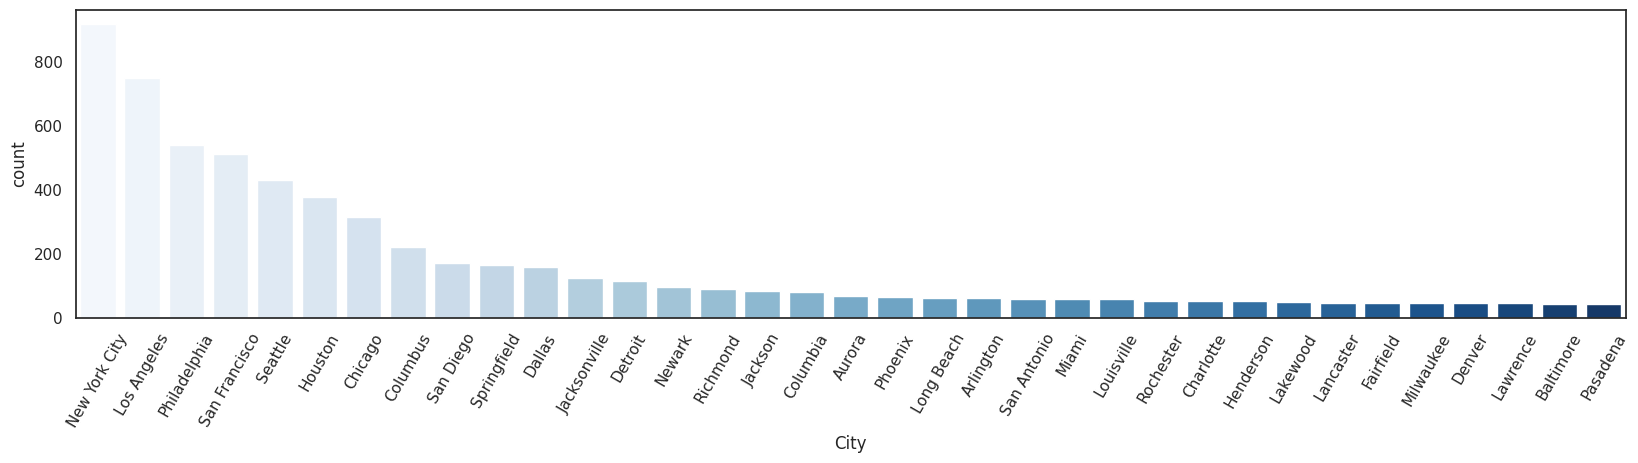

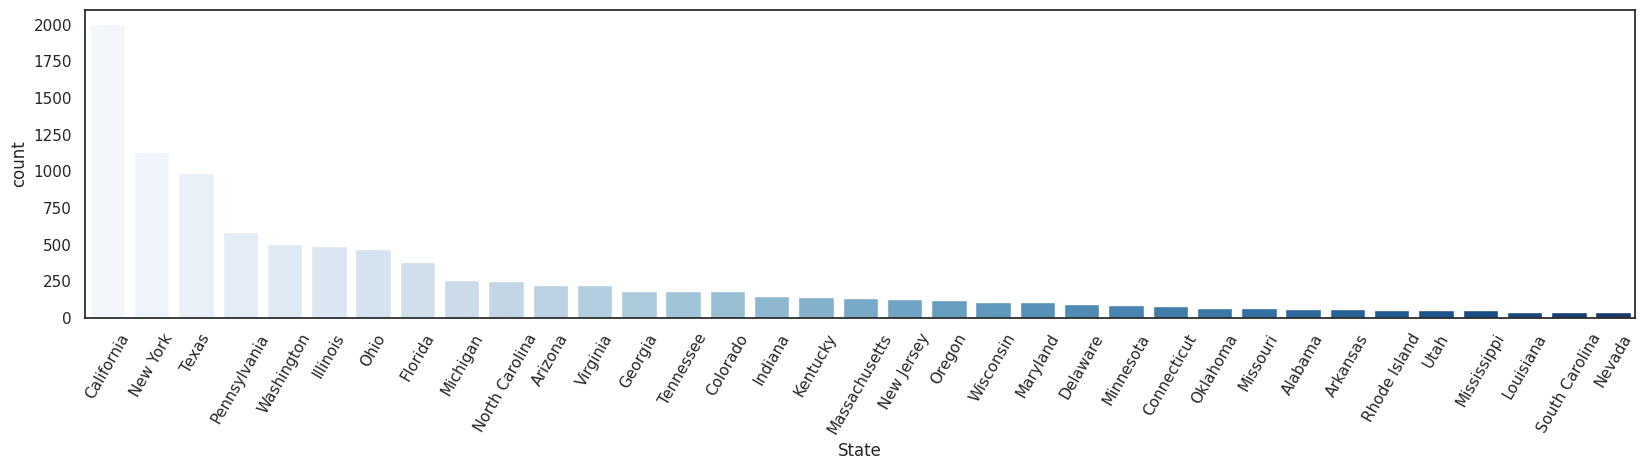

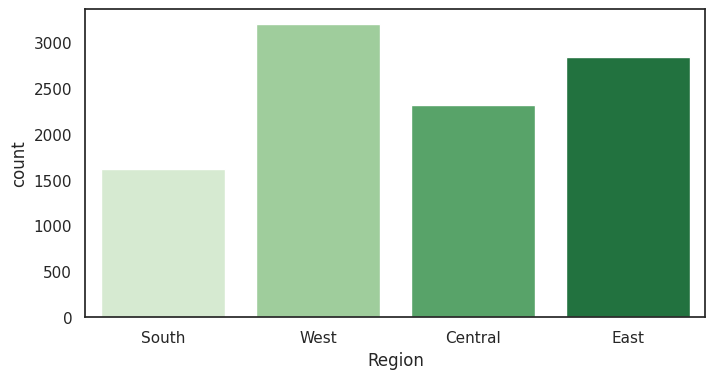

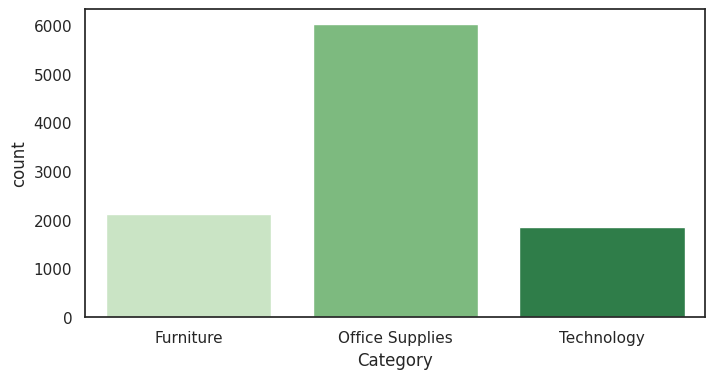

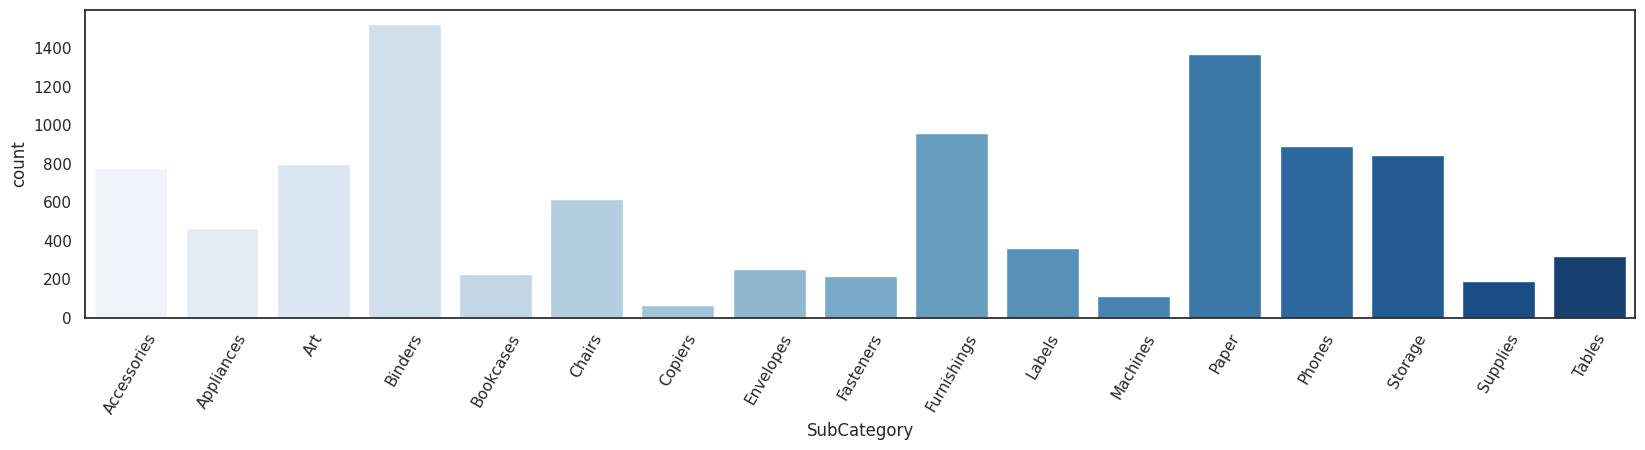

In [65]:
imp_categotical_features=df[['ShipMode','Segment', 'City', 'State','Region','Category', 'SubCategory']]

for col in imp_categotical_features:
    width=8
    n=len(df[col].unique())
    if n > 15:
        width=20
        plt.figure(figsize=(width,4))
        temp=pd.DataFrame(df[col].value_counts().sort_values(ascending=False)[:35],columns=[col])
        sns.barplot(data=temp,x=temp.index,y=col,palette= 'Blues')
        plt.ylabel("count")
        plt.xlabel(col)
        plt.xticks(rotation=60)
    else:
        plt.figure(figsize=(width,4))
        sns.countplot(data=df,x=col,palette='Greens')
    plt.show()

**COUNT OF SUB-CATEGORY**

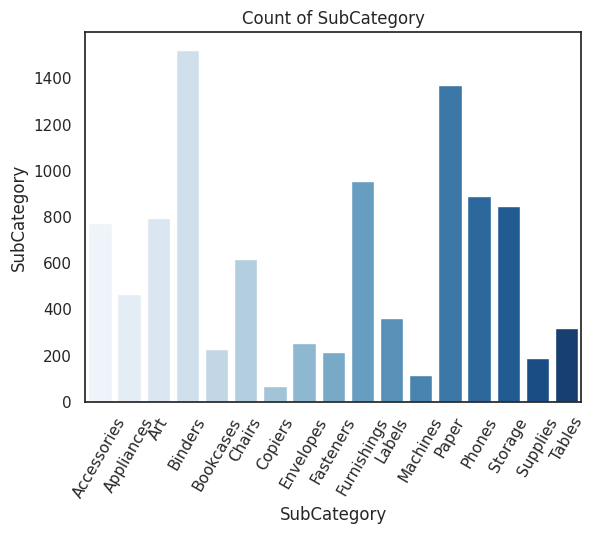

In [66]:
sns.countplot(x='SubCategory', data = df)
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(data=temp,x=temp.index,y=col,palette= 'Blues')
plt.xticks(rotation=60)
plt.title('Count of SubCategory')
plt.show()

**OBSERVATION FROM GENERAL EXPLORATORY DATA ANALYSIS ABOVE**
- Majority of the customers prefer the Standard Class Shipment mode.
- Most of the customers are from the Consumer segment.
- Among all the cities New York City records the maximum purchases made followed by Los Angeles.
- Among all the states New California records the maximum purchases made followed New York.
- Majority of the purchases are in the East and West regions as compared to South & Central.
- Office Supplies lead the purchases made Category.
- Binders and Paper are the leaders in Product Sub-Category.


**SALES AND PROFIT ANALYSIS**

In [67]:
sales_profit_segment1 = df.groupby('Segment').sum()[['DiscountedSales','Profit']]
sales_profit_segment1 = sales_profit_segment1.reset_index()
sales_profit_segment1

,Segment,DiscountedSales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.293718e+05,60310.7373


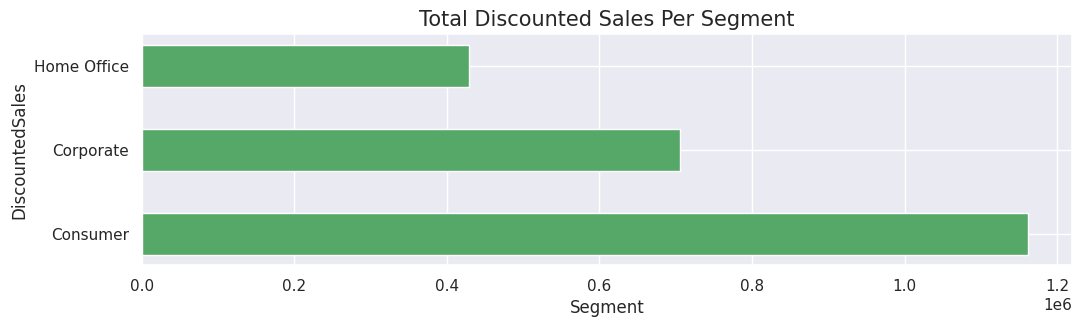

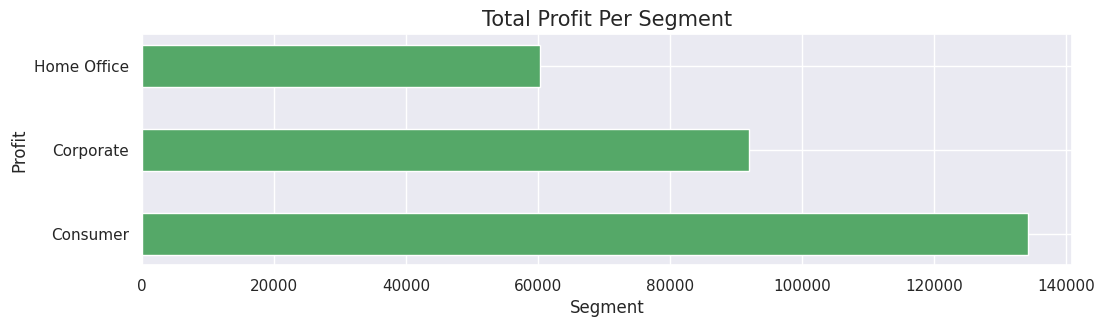

In [68]:
plt.figure(figsize=(12,3))
plt.barh(sales_profit_segment1['Segment'],sales_profit_segment1['DiscountedSales'],
        color = 'g',
        alpha = 1,
       height=0.5)

plt.title('Total Discounted Sales Per Segment',fontdict={'fontsize':15})
plt.ylabel('DiscountedSales')
plt.xlabel('Segment')
plt.show()

plt.figure(figsize=(12,3))
plt.barh(sales_profit_segment1['Segment'],sales_profit_segment1['Profit'],
        color = 'g',
        alpha = 1,
       height=0.5)

plt.title('Total Profit Per Segment',fontdict={'fontsize':15})
plt.ylabel('Profit')
plt.xlabel('Segment')
plt.show()

- From the above graphs, it is realized that the consumer segment is doing positively well in terms of profit and discounted sales anfd the Home Office segment is the least performing in terms of discounted sales and profit.
- Please keep in mind that this chart is based on the total amount of discounted sales and profit  for each segment.

In [69]:
sales_profit_segment = df.groupby('Segment').mean()[['DiscountedSales','Profit']]
sales_profit_segment = sales_profit_segment.reset_index()
sales_profit_segment

,Segment,DiscountedSales,Profit
0,Consumer,223.733644,25.836873
1,Corporate,233.823300,30.456667
2,Home Office,240.949370,33.844409


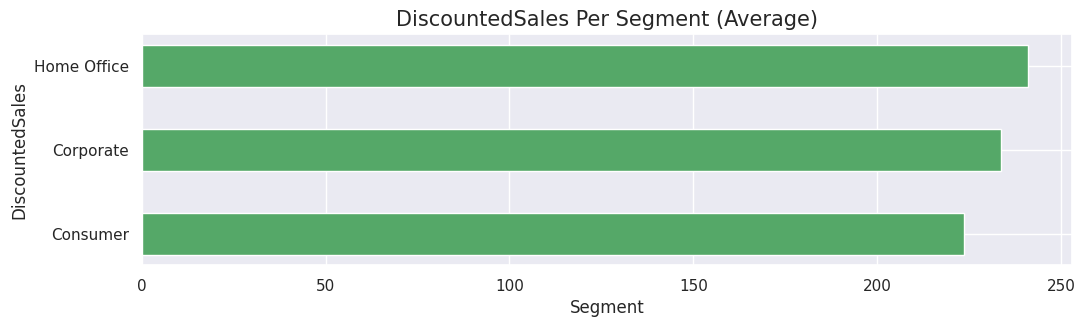

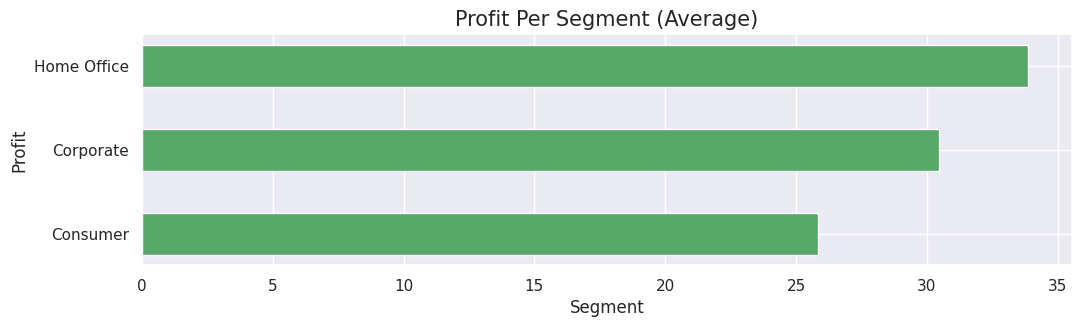

In [70]:
plt.figure(figsize=(12,3))
plt.barh(sales_profit_segment['Segment'],sales_profit_segment['DiscountedSales'],
        color = 'g',
        alpha = 1,
       height=0.5)

plt.title('DiscountedSales Per Segment (Average)',fontdict={'fontsize':15})
plt.ylabel('DiscountedSales')
plt.xlabel('Segment')
plt.show()

plt.figure(figsize=(12,3))
plt.barh(sales_profit_segment['Segment'],sales_profit_segment['Profit'],
        color = 'g',
        alpha = 1,
       height=0.5)

plt.title('Profit Per Segment (Average)',fontdict={'fontsize':15})
plt.ylabel('Profit')
plt.xlabel('Segment')
plt.show()


- Contrastingly, it is seen from the graphs n the mmediate lines of code that the consumer segment is doing poorly in terms of profit and discounted sales and the Home Office segment is the best performing in terms of discounted sales and profit.
- Please keep in mind that this chart is based on the average amount of discounted sales and profit  for each segment.

With the evident constrasts of the graphs results above based on changes such as the "total" and "average" of the segments, it is worth noting that basing your analysis on the total discounted sales or profit would provide misleading results.
- This is because the total takes into account the every single purchase made.
- The average takes into account every single purchase made wth all things equal.

**REGION WITH THE HIGHEST COUNT**

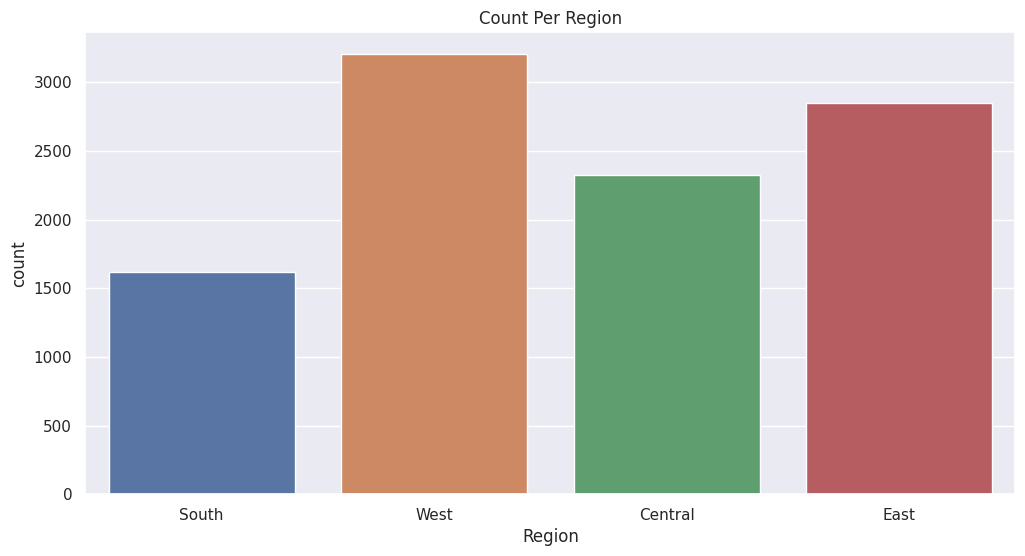

In [71]:
plt.figure(figsize=(12,6))
sns.countplot(x='Region', data = df)
plt.xticks(rotation = 0)
plt.title('Count Per Region')
plt.show()

**BEST SELLING AND MOST PROFITABLE CATEGORY**

In [72]:
df1_sum = pd.DataFrame(df.groupby(['Category'])[['DiscountedSales', 'Profit', 'Quantity']].sum())
df1_sum

,DiscountedSales,Profit,Quantity
Category,,,
Furniture,741718.4233,18463.3316,8026
Office Supplies,719047.0320,122490.8008,22906
Technology,836154.0330,145454.9481,6939


In [73]:
df1_avg = pd.DataFrame(df.groupby(['Category'])[['DiscountedSales', 'Profit', 'Quantity']].mean())
df1_avg

,DiscountedSales,Profit,Quantity
Category,,,
Furniture,349.867181,8.709119,3.785849
Office Supplies,119.324101,20.327050,3.801195
Technology,452.709276,78.752002,3.756903


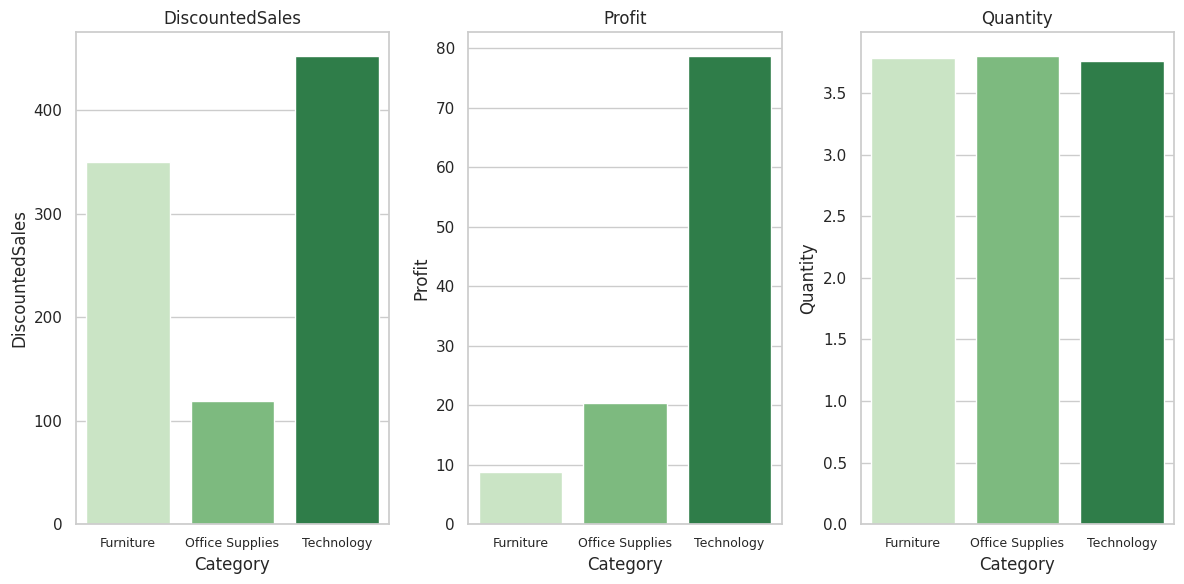

In [74]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(12, 6))
# Plot barplots
cat1 = sns.barplot(x = df1_avg.index, y = df1_avg.DiscountedSales, ax=axis[0], palette = "Greens")
cat2 = sns.barplot(x = df1_avg.index, y = df1_avg.Profit, ax=axis[1], palette = "Greens")
cat3 = sns.barplot(x = df1_avg.index, y = df1_avg.Quantity, ax=axis[2], palette = "Greens")
# Set titles
cat1.set(title = 'DiscountedSales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'horizontal', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'horizontal', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'horizontal', size = 9)
# Set spacing between subplots
figure.tight_layout()

- Here, we can see that all though the quantities of all the Categories are close to same as per the grapgh on the far right, it is shown that the Technology category has the highest sale, and equally brings in the most sales to the superstore.

- Next off, we see that the Furnture category is the second best selling category after the Technology category but brings in the least profits.

- Lastly, the least selling category shown as the Office Supplies, is the category bringing in the second best categoory performing in terms of profit.

These insights are important to be data driven decisions later in the final analysis.

**MOST PROFITABLE CATEGORY**

In [75]:
df2_avg = pd.DataFrame(df.groupby(['SubCategory'])[['DiscountedSales', 'Profit']].mean())

# Sort by descending order according to sales
sub_df2 = pd.DataFrame(df2_avg.sort_values('DiscountedSales', ascending = False))
sub_df2 = sub_df2.reset_index()
sub_df2.head(5)

,SubCategory,DiscountedSales,Profit
0,Copiers,2198.941618,817.909190
1,Machines,1645.553313,29.432669
2,Tables,648.794771,-55.565771
3,Chairs,532.739823,43.185430
4,Bookcases,503.859633,-15.230509


In [76]:
 # Sort by descending order according to profit
sub_profit_df2 = pd.DataFrame(sub_df2.sort_values('Profit', ascending = False))
sub_profit_df2 = sub_profit_df2.reset_index()
sub_profit_df2.head(5)

,index,SubCategory,DiscountedSales,Profit
0,0,Copiers,2198.941618,817.909190
1,9,Accessories,215.974604,54.111788
2,5,Phones,371.211534,50.073938
3,3,Chairs,532.739823,43.185430
4,8,Appliances,230.755710,38.922758


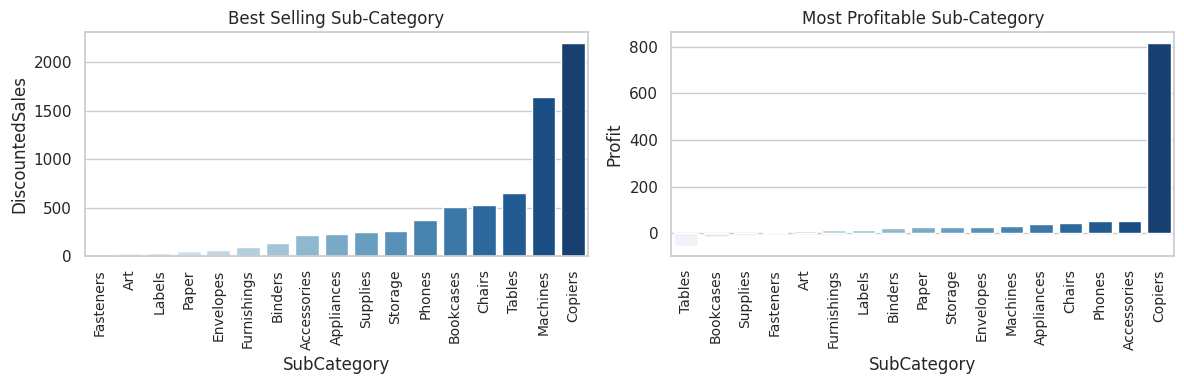

In [77]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 2, figsize=(12, 4))
subcat1 = sns.barplot(data = sub_df2, x = sub_df2.SubCategory, y = sub_df2.DiscountedSales, ax=axis[0], palette = "Blues",
                      order=sub_df2.sort_values('DiscountedSales').SubCategory)
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)
subcat2 = sns.barplot(data = sub_profit_df2, x = sub_profit_df2.SubCategory, y = sub_profit_df2.Profit, ax=axis[1],
                      palette = "Blues",order=sub_profit_df2.sort_values('Profit').SubCategory)
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)
figure.tight_layout()
plt.show()

- From the graph above to the right, it is shown that Tables, Bookcases, Supplies and Fasteners are the subcategories that are causing the most losses, as far as negative profit figures.
- From the graph to the left, the Copiers, Machines, Tables, Chairs and Bookcases are the best seling sub-categories.

It is worth noting that even though Copiers, Tables and Bookcases are the least profitable sub-categories, they are shown as the best selling sub-categories in the chart to the left.

It is an immediate recommendation that:

- Super Store should ensure inventory are always well-stocked for the top selling sub-category such as Copiers, Machines and Tables.
- Despite being most profitable, Copiers sell the least only 234, but as it is a relatively expensive office equipment that is usually used for few years, it is understandable that it sells the least among all
- Another interesting fact- people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss

**BEST PERFORMING CATEGORY**

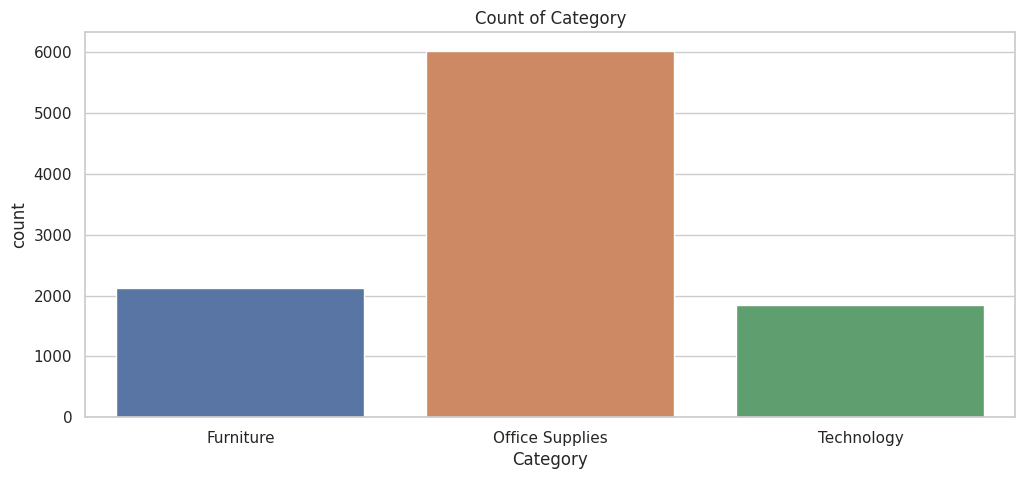

In [78]:
sns.countplot(x='Category', data = df)
plt.title('Count of Category')
plt.show()

As shown in the above lines of code:
    
- Office Supplies is the best performing category
- Furniture is the second best performing category
- Technology is the least performing category

**TOP TEN BEST PERFORMING CITIES**

In [79]:
city_sales_df = pd.DataFrame(df.groupby(['City'])['DiscountedSales','Quantity','Profit'].mean().
                             sort_values('DiscountedSales',ascending = False))
top10 = city_sales_df[:10]
top10

,DiscountedSales,Quantity,Profit
City,,,
Jamestown,2354.395000,4.500000,642.885750
Cheyenne,1603.136000,4.000000,100.196000
Bellingham,1263.413333,8.000000,203.530267
Independence,1208.685000,3.000000,487.831500
Burbank,1082.386000,4.333333,254.844600
Buffalo,906.349600,4.600000,99.287910
Burlington,866.723280,4.200000,-144.915088
Beverly,861.063333,5.000000,218.306467
Sparks,853.986667,6.333333,76.178667


In [80]:
bottom10 = city_sales_df[-10:]
bottom10

,DiscountedSales,Quantity,Profit
City,,,
Keller,6.000,2.0,2.10000
Loveland,5.241,2.0,1.11945
Layton,4.960,4.0,2.33120
Springdale,4.300,2.0,1.41900
San Luis Obispo,3.620,2.0,1.19460
Ormond Beach,2.808,3.0,-1.96560
Pensacola,2.214,3.0,-1.47600
Jupiter,2.064,1.0,0.15480
Elyria,1.824,1.0,-1.39840


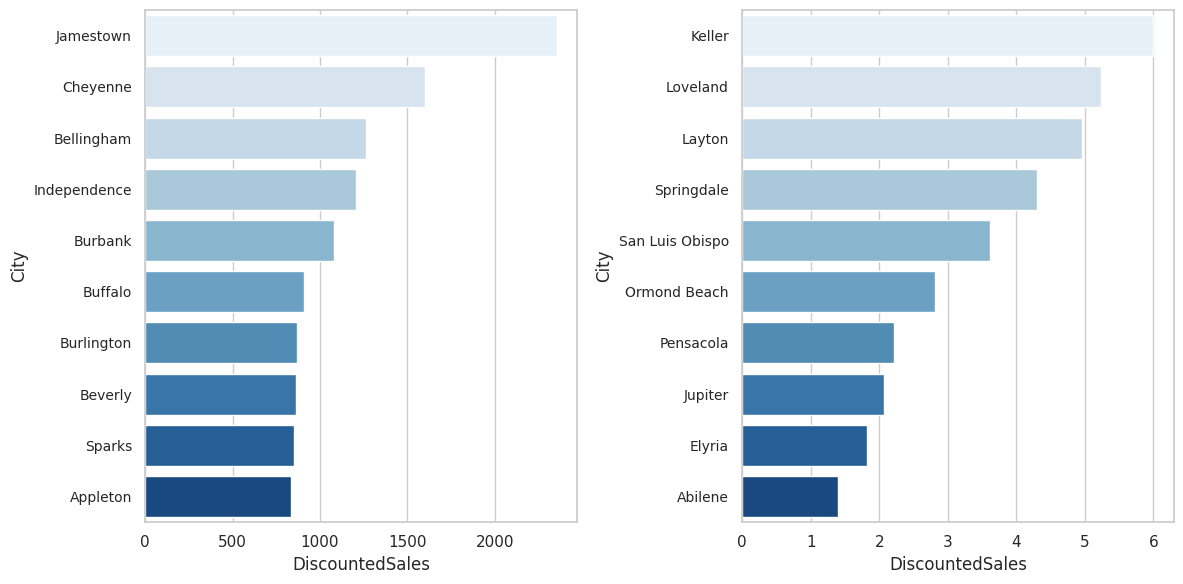

In [81]:
figure, axis = plt.subplots(1,2, figsize=(12, 6))
sns.set_theme(style="whitegrid")

top10c = sns.barplot(data = top10, y = top10.index, x = top10.DiscountedSales, palette = "Blues", ax = axis[0])
#top10c.set(Title = "Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)

# Plot Bar Plot for Best Selling Sub-Category
bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.DiscountedSales, palette = "Blues", ax=axis[1])
#bottom10c.set(Title = "Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)

# Set spacing between subplots
figure.tight_layout()
plt.show()

**PRODUCT ANALYSIS**

In [82]:
df['SubCategory'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
               ... 
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: SubCategory, Length: 17, dtype: int64

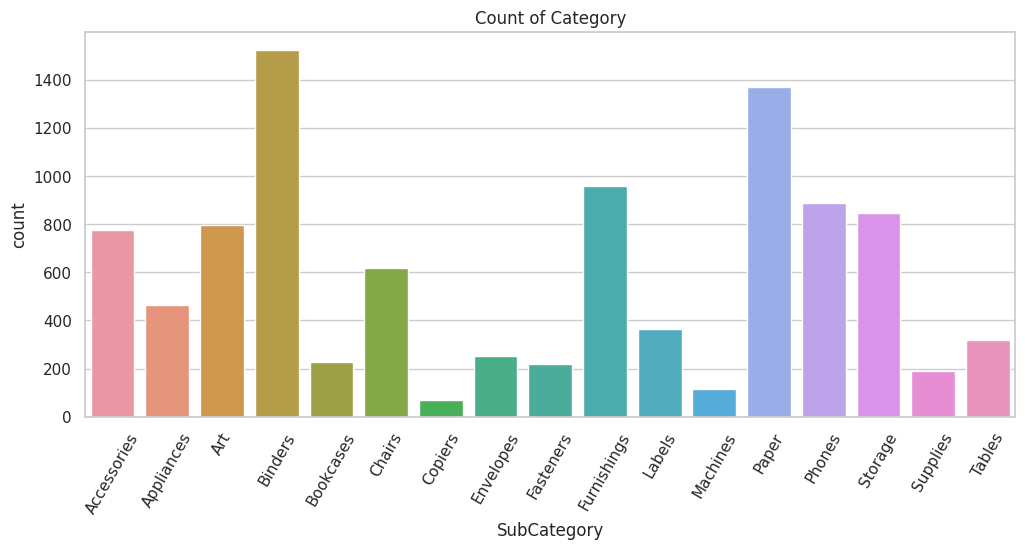

In [83]:
sns.countplot(x='SubCategory', data = df)
sns.set_theme(style="whitegrid")
plt.title('Count of Category')
plt.xticks(rotation = 60)
plt.show()

**BEST PERFORMING PRODUCT**

In [84]:
fur_entr=df[df['Category']=='Furniture']

In [85]:
fur_group=fur_entr.groupby(['Category', 'ProductName'])['Quantity'].sum().reset_index().sort_values('Quantity',
                                                                                                    ascending = False)
fur_group=fur_group[['ProductName','Quantity']].set_index('ProductName')
fur_group

,Quantity
ProductName,
KI Adjustable-Height Table,74
"Situations Contoured Folding Chairs, 4/Set",64
Staple-based wall hangings,62
Chromcraft Round Conference Tables,61
Eldon Wave Desk Accessories,61
...,...
"Iceberg Nesting Folding Chair, 19w x 6d x 43h",0
"Iceberg OfficeWorks 42"" Round Tables",0
KI Adjustable-Height Table,0


<Axes: ylabel='Quantity'>

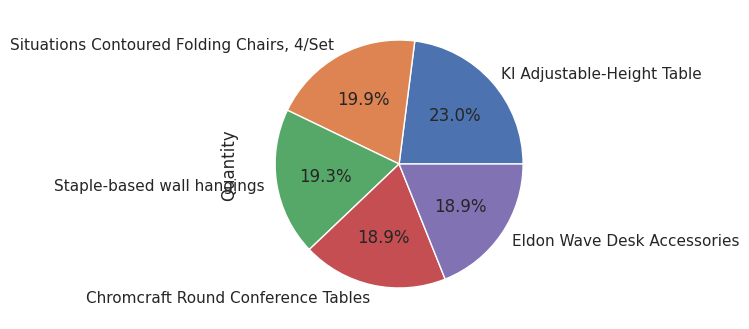

In [86]:
plt.figure(figsize=(4,8))
fur_group.head(5)['Quantity'].plot.pie(autopct="%1.1f%%")

**COUNT OF SUB-CATEGORY REGION-WISE**

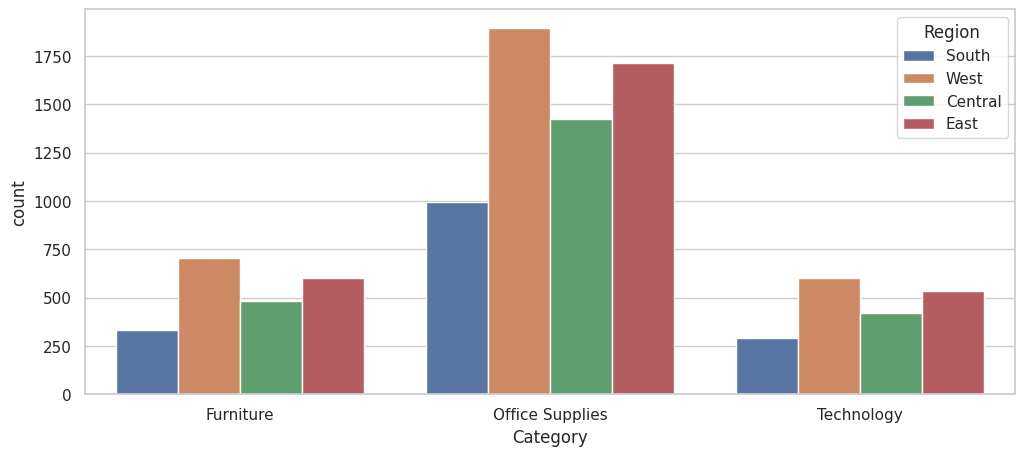

In [87]:
plt.figure(figsize=(12,5))
sns.countplot(x="Category", hue="Region", data=df)
plt.show()

- It is observed in the above line of code that people residing in Western part of US tend to order more from superstore.

**CUSTOMER ANALYSIS**

In [88]:
#Top 10 customers who order frequently
df_top10= df['CustomerName'].value_counts().head(10)
df_top10

William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
Seth Vernon            32
Jonathan Doherty       32
Edward Hooks           32
Zuschuss Carroll       31
Emily Phan             31
Name: CustomerName, dtype: int64

**DISCOUNT COLUMN INSIGHTS**

In [89]:
a = df.pivot_table('Discount(%)', index = 'SubCategory', aggfunc='sum')
a = a.reset_index().sort_values('Discount(%)')
a

,SubCategory,Discount(%)
6,Copiers,11.0
15,Supplies,14.6
8,Fasteners,17.8
7,Envelopes,20.4
10,Labels,25.0
...,...,...
12,Paper,102.6
5,Chairs,104.7
9,Furnishings,132.4
13,Phones,137.4


<Axes: xlabel='SubCategory'>

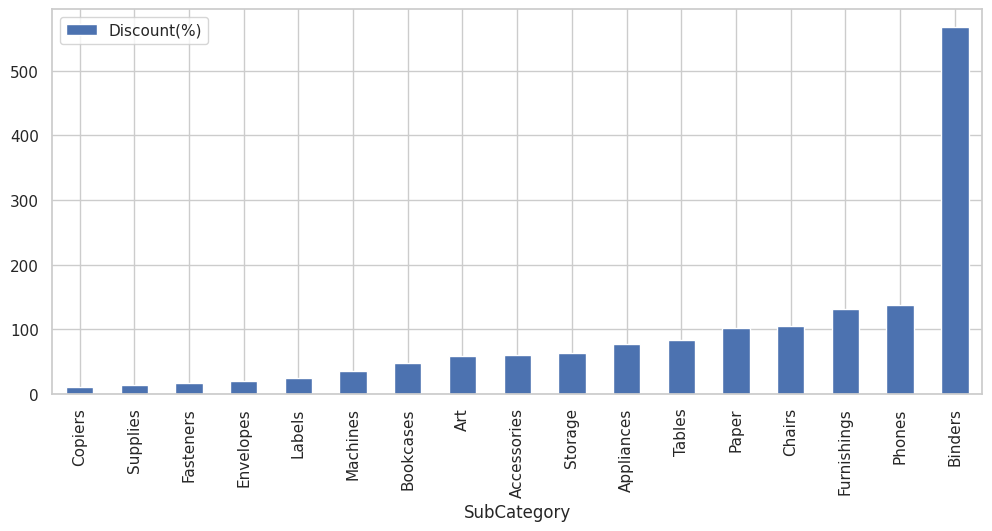

In [90]:
a.plot.bar(x= 'SubCategory')

**MONTHLY AND YEARLY ANALYSIS**

In [91]:
# Which month does the company records more sales?
month_sales_df = pd.DataFrame(df.groupby(['OrderMonth'])['DiscountedSales', 'Quantity', 'Profit', 'DiscountedAmount']
                              .mean().sort_values('DiscountedSales',ascending = False))
month_sales_df = month_sales_df.reset_index()
month_sales_df = month_sales_df.set_index('OrderMonth')
month_sales_df

,DiscountedSales,Quantity,Profit,DiscountedAmount
OrderMonth,,,,
March,294.548116,3.683908,41.084321,81.202257
January,249.146550,3.871391,23.974924,63.871586
October,244.594609,3.789988,38.808353,52.051960
November,239.606438,3.925901,24.111779,63.805642
December,231.032318,3.848722,30.801983,55.119763
...,...,...,...,...
June,212.996763,3.737796,29.687302,43.772818
May,210.923553,3.797279,30.491575,47.722392
July,207.377601,3.809859,19.482626,58.100511


- From September to December the company recorded the highest sales.

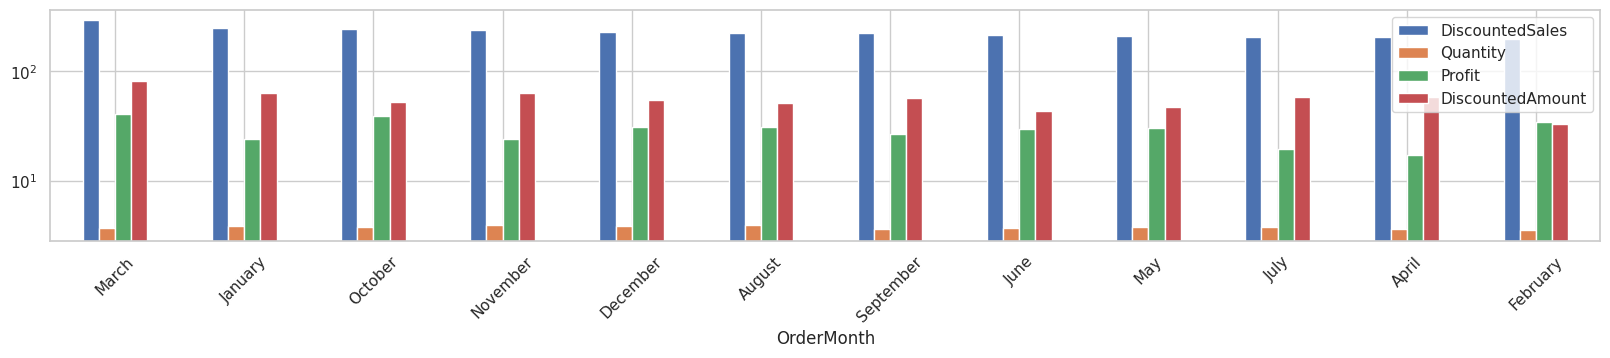

In [92]:
month_sales_df.plot(kind = 'bar', figsize = (20,3))
plt.xticks(rotation = 45)
plt.yscale('log')

In [93]:
tf = df.groupby(['OrderMonth'])['DiscountedSales', 'SubCategory', 'Profit', 'Quantity', 'DiscountedAmount'].sum()
tf.head()

,DiscountedSales,Profit,Quantity,DiscountedAmount
OrderMonth,,,,
April,137480.7566,11599.4951,2445,38533.1834
August,159044.0630,21776.9384,2784,35948.4570
December,325293.5035,43369.1919,5419,77608.6265
February,59751.2514,10294.6107,1067,10018.4986
January,94924.8356,9134.4461,1475,24335.0744


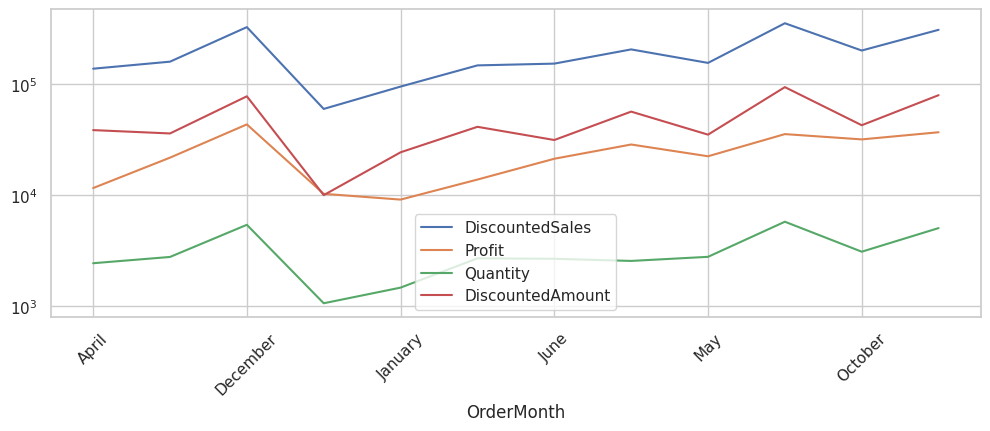

In [97]:
tf.plot(kind = 'line', figsize = (12,4))
plt.xticks(rotation = 45)
plt.yscale('log')

In [102]:
plt.figure(figsize = (16,5))
sns.lineplot('OrderMonth', 'DiscountedSales', data = tf, color = 'r', label= 'DiscountedSales')
plt.legend()

TypeError: ignored

<Figure size 1600x500 with 0 Axes>

In [100]:
tf = tf.reset_index()
tf

,OrderMonth,DiscountedSales,Profit,Quantity,DiscountedAmount
0,April,137480.7566,11599.4951,2445,38533.1834
1,August,159044.0630,21776.9384,2784,35948.4570
2,December,325293.5035,43369.1919,5419,77608.6265
3,February,59751.2514,10294.6107,1067,10018.4986
4,January,94924.8356,9134.4461,1475,24335.0744
...,...,...,...,...,...
7,March,205005.4888,28594.6872,2564,56516.7712
8,May,155028.8117,22411.3078,2791,35075.9583
9,November,352461.0710,35468.4265,5775,93858.0990
10,October,200322.9847,31784.0413,3104,42630.5553


In [101]:
plt.figure(figsize = (16,4))
sns.lineplot('DiscountedAmount', 'Profit', data = df, color = 'r', label= 'DiscountedAmount')
plt.legend()

TypeError: ignored

<Figure size 1600x400 with 0 Axes>

In [ ]:
# Which year does the company records more sales?
year_sales_df = pd.DataFrame(df.groupby(['OrderYear'])['DiscountedAmount', 'Profit'].mean().sort_values
                             ('OrderYear',ascending = True))
year_sales_df = year_sales_df.reset_index()
year_sales_df

- There is a gradual increase in sales, qauntity and profit of company records

In [ ]:
fig,ax = plt.subplots()       # Initalize a Figure and Axes
ax.plot(year_sales_df['OrderYear'], year_sales_df["Profit"], color='blue')   # Plot the CO2 variable in blue
ax.set_ylabel("Profit",color='blue')
ax.tick_params('y', colors='blue')
ax2 = ax.twinx()         # Create a twin Axes that shares the x-axis

ax2.plot(year_sales_df['OrderYear'], year_sales_df['DiscountedAmount'], color='red')    # Plot the relative temperature in red
ax2.set_ylabel("DiscountedAmount",color='red')
ax2.tick_params('y', colors='red')
plt.show()

**WHICH CUSTOMER SEGMENT IS THE MOST PROFITABLE?**

In [ ]:
df4 = pd.DataFrame(df.groupby(['Segment'])[['Profit']].mean())
df4

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(data = df4, x = df4.index, y = df4.Profit, palette = "Blues")
plt.title("Customer Segment Profitability")
plt.show()

**WHICH IS THE PREFERRED SHIP MODE?**

In [ ]:
# Taking a subset of data (To keep things simple)
df_stackb = df[['ShipMode','DiscountedSales','Profit']]
# taking a groupby on category and then ship mode...
df_stackb = df_stackb.groupby(['ShipMode']).sum().reset_index()
# df_stackb

# Visualizing the Stacked BarChart
plt.figure(figsize=[10,15])
plt.subplot(3,1,1)
plt.bar(x=df_stackb['ShipMode'], height=df_stackb['DiscountedSales'], color='#F05454')
plt.bar(x=df_stackb['ShipMode'], height=df_stackb['Profit'], bottom=df_stackb['DiscountedSales'], color='#30475E')
plt.title("Sales & Profit Across Ship Modes", size=20, pad=20)
plt.legend(['Sales','Profit'])

#### LOSS ANALYSIS

In [ ]:
loss_df = df[df['Profit'] < 0]

In [ ]:
loss_with_zero_df = df[(df['Profit'] < 0) & (df['Discount(%)'] == 0)]
loss_with_zero_df.head()

In [ ]:
loss_df.head(2)

**MONEY LOSS WITHIN THE FOUR YEAR RANGE IN DOLLARS**

In [ ]:
Total_loss=np.negative(loss_df['Profit'].sum())
print("Total loss = %.2f" %Total_loss)

In [ ]:
loss_df['Discount(%)'].mean()

In [ ]:
loss_df.groupby(by='Segment').mean()

In [ ]:
loss_df.groupby(by='SubCategory').mean().sort_values('Profit',ascending=True).head(3)

In [ ]:
loss_df.groupby(by='City').mean().sort_values('Profit',ascending=True).head(3)

In [ ]:
loss_df.sort_values(['DiscountedSales'],ascending=True).groupby(by='Category').mean()

In [ ]:
plt.rcParams['figure.figsize']=(15,3)
plt.bar(loss_df['SubCategory'],loss_df['DiscountedSales']);
plt.rcParams.update({'font.size':10});
plt.xlabel('SubCategory');
plt.ylabel('DiscountedSales');

In [ ]:
plt.rcParams['figure.figsize']=(28,8)
plt.bar(df['SubCategory'],df['DiscountedAmount']);
plt.rcParams.update({'font.size':14});
plt.xlabel('SubCategory')
plt.ylabel('DiscountedAmount')
plt.show()

In [ ]:
plt.rcParams['figure.figsize']=(10,8)
plt.bar(df['ShipMode'],df['DiscountedSales']);
plt.rcParams.update({'font.size':14});
plt.xlabel('ShipMode');
plt.ylabel('DiscountedSales');

**SALES, PROFIT PROPORTIONS ACROSS VARIOUS FEATURES**

**CUSTOMER REGIONAL ANALYSIS**

In [ ]:
region_analysis = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

In [ ]:
# Plot Pie Chart
plt.pie(region_analysis.Profit,
        labels = region_analysis.Region,
        startangle = 90, autopct = "%1.0f%%",
        explode = [0, 0, 0, 0.1])
plt.title("Most Profitable by Region")
plt.show()

- Analysis of delayed orders and timely order. I set a limit of the delivery days to be 5. Any item delivered later than five
is considered late/delayed as shown below.

In [ ]:
plt.figure(figsize=(10,5))
delayed_count=df['Reliability'].value_counts()
delayed_count.plot(kind = 'bar',title = 'Timely vs Delayed',rot=0)

- Shipping-Mode Wise Distribution

In [ ]:
shipping_dist = df.pivot_table(index='ShipMode',
                                         columns='Reliability',
                                         values='OriginalSales',
                                         aggfunc='count',
                                         margins=True)
shipping_dist.rename({ 'All':'TotalOrders'}, axis=1, inplace=True)
shipping_dist['Timely_proportion'] = round((shipping_dist['Timely']/shipping_dist['TotalOrders'])*100,2)
shipping_dist['Delayed_proportion'] = round((shipping_dist['Delayed']/shipping_dist['TotalOrders'])*100,2)
shipping_dist

Orders shipped with the 'first class' and 'Same day' modes did not experience any delay in their delivery. Same can be said for the larger sect of those who ordered using second class. Majority of the delayed orders can be found with customers who shipped using standard class.
I went on to check the region distribution of the delayed and timely delivery to see if the distance also played a role


**REGION-WISE DISTRIBUTION**

In [ ]:
region_dist = df.pivot_table(index='Region',
                               columns='Reliability',
                               values='OriginalSales',
                               aggfunc='count',
                               margins=True)
region_dist.rename({ 'All':'TotalOrders'}, axis=1, inplace=True)
region_dist['Timely_proportion'] = round((region_dist['Timely']/region_dist['TotalOrders'])*100,2)
region_dist['Delayed_proportion'] = round((region_dist['Delayed']/region_dist['TotalOrders'])*100,2)
region_dist

- Maximum percentage of delayed orders has been from the Central Region with the East experiencing the least.

#### RECOMMENDATIONS
- Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.
- Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.
- For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.
- For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.
- Consumer and Corporate Segment make up more than 70% of customerbase. Target them, especially customers from the East and West region in the Top 10 cities with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers

The main reason which leads to loss is Discount as if some areas lead to loss due to more discounts, and some areas lead to fewer sales due to fewer discounts, hence it needs to be improved.
It is better to give more discounts during festival seasons, additionally, that will result in more sales.
The Home office segment needs better improvement.
Some cities have fewer sales, lack of awareness can be the reason for this, hence advertising in those cities might help in more sales.

#### ADVERTISING STRATEGY FOR GROUPED PRODUCTS

In the event that the company wants to run product package promos, that is, where two or three items can be sold together, we can find the most common items that are usually bought together to inform the company's decsion.

In [ ]:
#creating a dataset with order id's having more than one item ordered with same id
common_orderid=df[df['OrderID'].duplicated(keep=False)]

# Because i am about to combine items with the same order id and separate by a comma, i have to remove the comma
# from the product names in the individual rows
common_orderid['ProductName'] = common_orderid['ProductName'].str.replace(',','')

#Groupting products having the same order id into one row separated by a comma
common_orderid['grouped'] = common_orderid.groupby(['OrderID'])['ProductName'].transform(lambda x : ','.join(x))
common_orderid.head(5)